In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [30]:
df = pd.read_csv("FuelConsumption.csv")

In [31]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


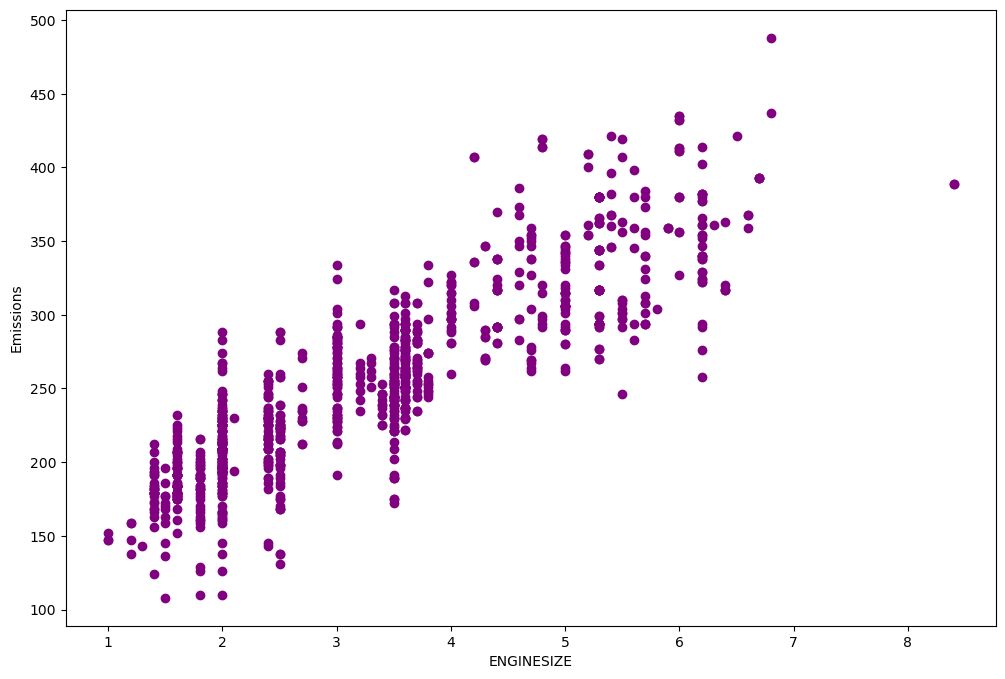

In [32]:
plt.rcParams['figure.figsize']=(12,8)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="purple")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],cdf['CO2EMISSIONS'], test_size=0.2)


- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynominal in x.                    
2nd degree:                                               
y=b+Q1 x+ Q2 x^2                                        


In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [64]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_test = np.asanyarray(y_test)

poly=PolynomialFeatures(degree=2)

In [65]:
train_x_poly=poly.fit_transform(X_train)
print(train_x_poly)


[[ 1.    4.7  22.09]
 [ 1.    5.3  28.09]
 [ 1.    1.8   3.24]
 ...
 [ 1.    3.3  10.89]
 [ 1.    2.    4.  ]
 [ 1.    3.5  12.25]]


In [66]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [67]:
train_y=clf.fit(train_x_poly,y_train)
print("Coefficients: " ,clf.coef_)
print("Intercept: ", clf.intercept_)


Coefficients:  [ 0.         50.87244577 -1.54879148]
Intercept:  106.60181959768738


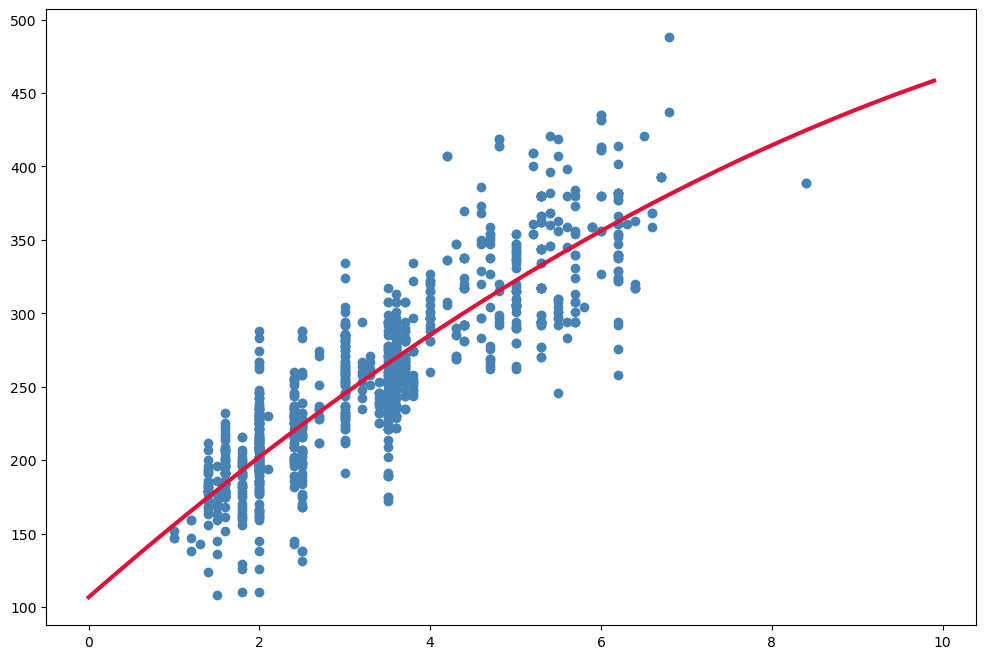

In [69]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="steelblue")
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_+clf.coef_[1]*XX+ clf.coef_[2] * np.power(XX,2)
plt.plot(XX,yy,"crimson",linewidth=3)

# Evaluation

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
test_y_predicted = clf.predict(poly.fit_transform(X_test))

# R-kare değeri
r2 = r2_score(y_test, test_y_predicted)
print("R-squared:", r2)

# Ortalama Karesel Hata (MSE)
mse = mean_squared_error(y_test, test_y_predicted)
print("Mean Squared Error:", mse)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, test_y_predicted)
print("Mean Absolute Error:", mae)

R-squared: 0.7848842619306332
Mean Squared Error: 787.5355276321285
Mean Absolute Error: 21.277531335001438


### Practice
Try to use a polynomial regression with the dataset but this time with degree three(cubic) Does it result in better accuracy?

In [78]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly_3 = poly3.fit_transform(X_train)
model = clf.fit(train_x_poly_3,y_train)
clf.coef_


array([ 0.        , 32.68572127,  3.42622151, -0.40980368])

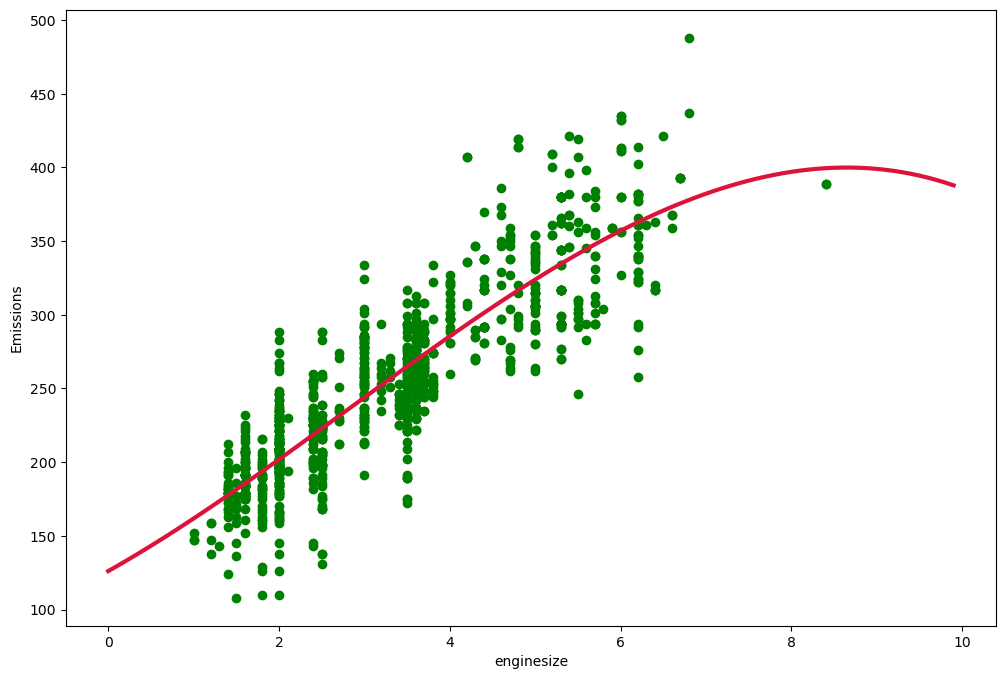

In [79]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_ + clf.coef_[1]*XX + clf.coef_[2]*np.power(XX,2) + + clf.coef_[3]*np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
test_y_predicted3 = clf.predict(poly3.fit_transform(X_test))

# R-kare değeri
r2 = r2_score(y_test, test_y_predicted3)
print("R-squared:", r2)

# Ortalama Karesel Hata (MSE)
mse = mean_squared_error(y_test, test_y_predicted3)
print("Mean Squared Error:", mse)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, test_y_predicted3)
print("Mean Absolute Error:", mae)

R-squared: 0.7848842619306332
Mean Squared Error: 787.5355276321285
Mean Absolute Error: 21.277531335001438
